# Neural Network Implementation
For a small sample from the digits data (contains 5s and 6s only). Data is the same as for the adaboost and SVM implementation. Here we implement a two layer neural net multi-layer perceptron. 

## Introduction 
A perceptron seeks to separate the positive examples and negative examples by projecting them onto $\beta$, or
in other words, separating them using a hyperplane. If the data are not linearly separable, a perceptron
cannot work. We may need to transform the original variables into some features so that they can be linearly
separated. One way to solve this problem is to generalize the perceptron into multi-layer perceptrons. This structure is also called feedforward neural network. The neural network is logistic regression on top of logistic regressions, $y_i$ follows a logistic regression on $h_i = (h_{ik}, k=1,...,d)^T$ and each $h_{ik}$ follows a logistic regression on $X_i = (x_{ij}, j = 1,...,p)^T$

$$y_i \sim Bernoulli(p_i) $$
$$p_i = \sigma(h_i^T \beta) = \sum_{k=1}^d \beta_k h_{ik} $$
$$z_{ik} = \sigma(X_i^T \alpha_k) = \sum_{j=1}^p \alpha_{kj} x_{ij} $$

In [1]:
import numpy as np
import csv
import random
import math
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('ggplot')

In [3]:
def prepare_data(valid_digits=np.array((6,5))):
    if len(valid_digits)!=2:
        raise Exception("Error: you must specify exactly 2 digits for classification!")

    csvfile=open('digits.csv','r')
    reader=csv.reader(csvfile)
    data=[]
    for line in reader:
        data.append(line)

    csvfile.close()
    digits=np.asarray(data,dtype='float')

    X = digits[(digits[:,64]==valid_digits[0]) | (digits[:,64]==valid_digits[1]),0:64]
    Y = digits[(digits[:, 64] == valid_digits[0]) | (digits[:, 64] == valid_digits[1]), 64:65]

    X_norm = X/np.max(X, axis=1)[:,None]
    
    Y[Y==valid_digits[0]]=0
    Y[Y==valid_digits[1]]=1

    training_set=random.sample(range(360),270)

    testing_set=list(set(range(360)).difference(set(training_set)))

    X_train=X_norm[training_set,:]
    Y_train=Y[training_set,]

    X_test=X_norm[testing_set,:]
    Y_test=Y[testing_set,]

    return X_train,Y_train,X_test,Y_test


def accuracy(p,y):
    acc=np.mean((p>0.5)==(y==1))
    return acc

In [4]:
def my_NN(X_train, Y_train, X_test, Y_test, num_hidden=20, num_iterations=1000, learning_rate=1e-1):

    n=X_train.shape[0]
    p=X_train.shape[1]+1
    ntest=X_test.shape[0]
    X_train1= np.concatenate((np.repeat(1,n,axis=0).reshape((n,1)),X_train),axis=1)
    X_test1 = np.concatenate((np.repeat(1, ntest, axis=0).reshape((ntest, 1)), X_test), axis=1)
    
    alpha=np.random.standard_normal((p,num_hidden))
    beta=np.random.standard_normal((num_hidden+1,1))

    acc_train=np.repeat(0.,num_iterations)
    acc_test=np.repeat(0.,num_iterations)

    
    for it in range(num_iterations):
        Z = 1 / (1 + np.exp(-np.dot(X_train1, alpha)))
        Z1 = np.concatenate((np.repeat(1, n, axis=0).reshape(n, 1), Z), axis=1)
    
        pr = 1 / (1 + np.exp(-np.dot(Z1, beta))) #nX1
        
        dbeta = np.dot(np.repeat(1,n,axis=0).reshape(1,n), (np.repeat(Y_train-pr, num_hidden+1, axis = 1).reshape(n, num_hidden+1)*Z1)/n)  #1X numhidden + 1
        beta = beta + learning_rate * dbeta.T
        
        for k in range(num_hidden):
            da = (Y_train - pr)*beta[k+1]*Z[:, k].reshape(n, 1)*(1-Z[:, k].reshape(n,1))
            dalpha = np.dot(np.repeat(1,n,axis=0).reshape(1,n), (np.repeat(da, p, axis=1)*X_train1)/n)
            alpha[:, [k]] = alpha[:, [k]] + learning_rate * dalpha.T
            
        acc_train[it] = accuracy(pr, Y_train)
        Ztest = 1/(1 + np.exp(-np.dot(X_test1, alpha)))
        Ztest1 = np.concatenate((np.repeat(1,ntest,axis=0).reshape((ntest,1)),Ztest),axis=1)
        prtest = 1/(1 + np.exp(-np.dot(Ztest1, beta)))
        acc_test[it] = accuracy(prtest, Y_test)

    ## Function outputs 4 things:
    ## 1. The learned parameters of the first layer of the neural network, alpha
    ## 2. The learned parameters of the second layer of the neural network, beta
    ## 3. The accuracy over the training set, acc_train (a "num_iterations" dimensional vector).
    ## 4. The accuracy over the testing set, acc_test (a "num_iterations" dimensional vector).
    return alpha,beta,acc_train,acc_test


In [5]:
X_train, Y_train, X_test, Y_test = prepare_data()
alpha,beta,acc_train,acc_test=my_NN(X_train,Y_train,X_test,Y_test,num_hidden=50,num_iterations=1000,learning_rate=1e-2)

## Visualizations and Plots
 
Traning and testing accuracies across time

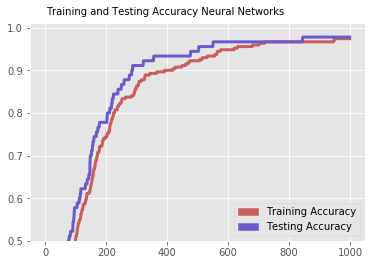

In [6]:
x = range(1000)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(.5,1.01)
ax.plot(x, acc_train, color='indianred', linewidth=3)
ax.plot(x, acc_test, color='slateblue', linewidth=3)
ax.text(1,1.03, 'Training and Testing Accuracy Neural Networks')

#Legend patches
trainpatch = mpatches.Patch(color='indianred', label='Training Accuracy')
testpatch = mpatches.Patch(color='slateblue', label='Testing Accuracy')
plt.legend(handles=[trainpatch, testpatch])
plt.show()

### Visualized mean image from Neural Net Output


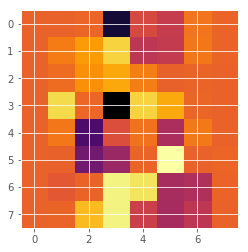

In [7]:
mean_xtrain_nn = np.mean(X_train*np.repeat(np.dot(alpha[1:, :],beta[1:,:]), 270, axis=0).reshape(64, 270).T, axis=0).reshape(8, 8)
plt.imshow(mean_xtrain_nn, cmap=mpl.cm.get_cmap("inferno"))
plt.savefig('mean_nn_train.png')
plt.show()

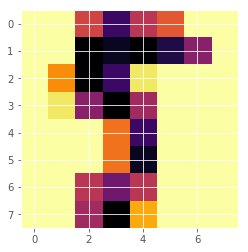

In [8]:
# Example single image visualization for comparison
mean_xtrain_nn = X_train[20,:].reshape(8, 8)
plt.imshow(mean_xtrain_nn, cmap=mpl.cm.get_cmap("inferno_r"))
plt.show()